In [35]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt

In [94]:
covidData = pd.read_csv("germanyCases.csv")
covidData = covidData[['dates', 'confirmed', 'recovered', 'deaths']]
covidData.head()

,dates,confirmed,recovered,deaths
0,1.22.20,0,0,0
1,1.23.20,0,0,0
2,1.24.20,0,0,0
3,1.25.20,0,0,0
4,1.26.20,0,0,0


In [97]:
# Population of the country with data
germanyPop = 83214427
# Tuning parameter for 'steepness' of optimistic projection
alpha = 0.003471
t0 = 0
length = np.shape(covidData)[0]
# arctan fake projection of testing 
projected = np.floor(
    germanyPop * ((
        np.arctan(
        alpha * (range(740) - t0 * np.ones(740))
        ) 
        + np.pi / 2
        )) / (np.pi)
)
covidData['project'] = projected
covidData.head()

,dates,confirmed,recovered,deaths,project
0,1.22.20,0,0,0,41607213.0
1,1.23.20,0,0,0,41699152.0
2,1.24.20,0,0,0,41791090.0
3,1.25.20,0,0,0,41883022.0
4,1.26.20,0,0,0,41974948.0


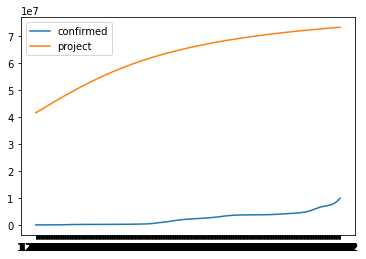

In [98]:
plt.plot('dates', 'confirmed', data=covidData)
plt.plot('dates', 'project', data=covidData)
plt.legend()